# Sujet 3 : L'épidémie de choléra à Londres en 1854

https://www.fun-mooc.fr/courses/course-v1:inria+41016+session02/courseware/5b932aa591d245d48d8943385cb3120a/57c96f2c7f7b42018eaac3e6b34546f4/4?activate_block_id=block-v1%3Ainria%2B41016%2Bsession02%2Btype%40vertical%2Bblock%4044b5ae6135284dccba16386681ed51d4

Use the **spec-file.txt** (or environment.yml) to set same environment if troubles.

#### Data:
- Data were downloaded at: http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/  
- Other data in csv (not used): https://github.com/gillespilon/broad_street_cholera_outbreak

#### Open shape file with: 
- https://pypi.org/project/pyshp/#reading-shapefiles-using-the-context-manager (not used)
- https://gis.stackexchange.com/questions/113799/how-to-read-a-shapefile-in-python (others)
- **http://geopandas.org/gallery/plotting_basemap_background.html#sphx-glr-gallery-plotting-basemap-background-py (used)**

#### Packages installation (if you don't use the spec-file or if it doesn't install everything):
- Install **folium**: `conda install folium -c conda-forge` (https://python-visualization.github.io/folium/installing.html)
- Install **contextily**: `pip install contextily==1.0rc2` (https://github.com/darribas/contextily)

## Import packages

In [16]:
# For interactive plots
%matplotlib notebook

import geopandas as gpd  # Open shape files
import contextily as ctx # Add maps
import folium            # Other maps

## First try with geopandas

In [8]:
death = gpd.read_file('SnowGIS_SHP/Cholera_Deaths.shp')
death

,Id,Count,geometry
0,0,3,POINT (529308.741 181031.352)
1,0,2,POINT (529312.164 181025.172)
2,0,1,POINT (529314.382 181020.294)
3,0,1,POINT (529317.380 181014.259)
4,0,4,POINT (529320.675 181007.872)
...,...,...,...
245,0,3,POINT (529362.665 181156.058)
246,0,2,POINT (529365.152 181176.129)
247,0,1,POINT (529274.165 180907.313)
248,0,1,POINT (529299.361 180873.185)


In [9]:
pumps = gpd.read_file('SnowGIS_SHP/Pumps.shp')
pumps

,Id,geometry
0,0,POINT (529396.539 181025.063)
1,0,POINT (529192.538 181079.391)
2,0,POINT (529183.740 181193.735)
3,0,POINT (529748.911 180924.207)
4,0,POINT (529613.205 180896.804)
5,0,POINT (529453.586 180826.353)
6,0,POINT (529593.727 180660.455)
7,0,POINT (529296.104 180794.849)


### Convert the data to Web Mercator
http://geopandas.org/gallery/plotting_basemap_background.html#convert-the-data-to-web-mercator  

Web map tiles are typically provided in Web Mercator (EPSG 3857), so we need to make sure to convert our data first to the same CRS to combine our polygons and background tiles in the same map:

In [10]:
death = death.to_crs(epsg=3857)
pumps = pumps.to_crs(epsg=3857)

### Make plot

<IPython.core.display.Javascript object>


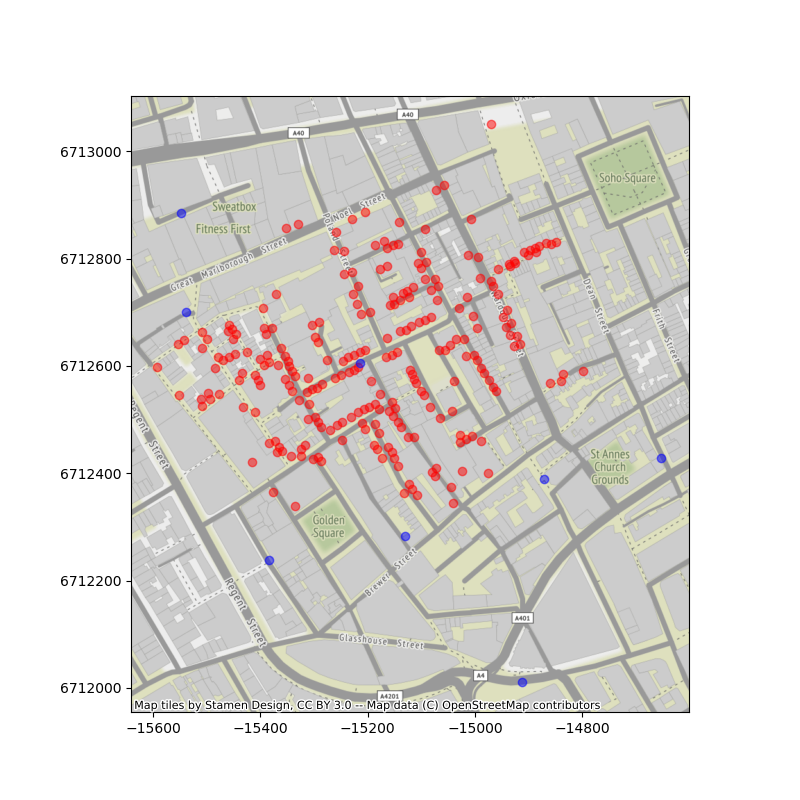

In [20]:
ax = death.plot(figsize=(8,8), alpha=0.5, color='red')
pumps.plot(ax=ax, alpha=0.5, color='blue')
ctx.add_basemap(ax)

TODO: Need to change the size of death points depending of the Count

## Other possibility with folium?

In [23]:
m = folium.Map(location=[51.5144, -0.1354], zoom_start=14)
folium.CircleMarker(location=[51.5144, -0.1354],fill=True).add_to(m)
m

TODO: add the points thanks to the lat/lon? Need to convert from original data!